# Importing Libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

# Part a

In [29]:
df_student = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/student.csv', delimiter=';')
df_student.drop(['G1', 'G2'], axis=1, inplace=True)
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13


# Part b

To increse the score of the model we need to remove the features which are recursive. Removing recursive feature reduces the computational cost and increase the efficiency.

I got the Error "could not convert string to float: 'GP'". As a result I decided to use Get Dummies to solve this problem.

In [26]:
## Select Categorical Columns:
cols = df_student.select_dtypes(include=['object']).columns
cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [32]:
df_student = pd.get_dummies(df_student, columns = cols)
df_student.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


Now let's create X and y

In [33]:
X = df_student.drop('G3', axis=1) 
y = df_student['G3']

In [34]:
## Ordinary least Squares
ols = LinearRegression()

rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_log_error", verbose=0)
rfecv.fit(X, y)
rfecv.transform(X)
print(rfecv)

RFECV(estimator=LinearRegression(), scoring='neg_mean_squared_log_error')


## Number of Important features

In [35]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 45


## Scoring on number of features selected

In [36]:
grid_scores = rfecv.grid_scores_
grid_scores = np.mean(grid_scores, axis=1)
grid_scores.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


(56,)

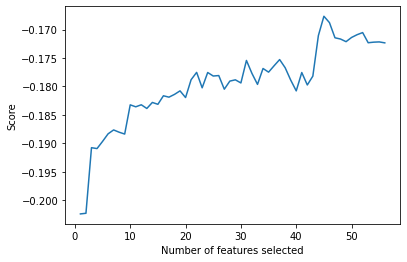

In [37]:
min_features_to_select = 1
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Score")
plt.plot(
    range(min_features_to_select, len(grid_scores) + min_features_to_select),
    grid_scores,
)

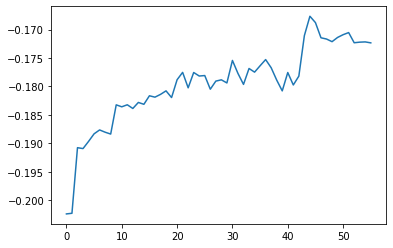

In [39]:
plt.plot(rfecv.cv_results_['mean_test_score'])

## Ranking

In [38]:
print(f"Importance of columns using ranking_: {rfecv.ranking_}")

Importance of columns using ranking_: [ 7 12  6 10  1  1  4  5  9  2  8  3 11  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]


It's clear that we have 56 features and our model have selected 45 features of the given features. 
We can recognize the ranking of columns as well. 